In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/Nalaiyathiran/CNN

/content/drive/MyDrive/Nalaiyathiran/CNN


In [ ]:
pwd

'/content/drive/MyDrive/Nalaiyathiran/CNN'

In [ ]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  infla

##Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen= ImageDataGenerator(rescale= 1./255,zoom_range= 0.2,horizontal_flip= True,vertical_flip= True)

In [ ]:
test_datagen= ImageDataGenerator(rescale= 1./255)

In [ ]:
x_train= train_datagen.flow_from_directory(r"/content/drive/MyDrive/Nalaiyathiran/CNN/Flowers Dataset/training_set",target_size=(64,64),class_mode= "categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [ ]:
x_test= test_datagen.flow_from_directory(r"/content/drive/MyDrive/Nalaiyathiran/CNN/Flowers Dataset/test_set",target_size=(64,64),class_mode= "categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

##CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [ ]:
#initialize
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),activation="relu",strides=(1, 1),input_shape=(64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

In [ ]:
model.add(Dense(5,activation="softmax"))

In [ ]:
model.compile(loss= "categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
len(x_train)

180

In [ ]:
model.fit(x_train, epochs= 5,steps_per_epoch=len(x_train), validation_data=x_test,validation_steps=len(x_test))

Epoch 1/5
180/180 [==============================] - 46s 257ms/step - loss: 1.5988 - accuracy: 0.2437 - val_loss: 1.5985 - val_accuracy: 0.2437
Epoch 2/5
180/180 [==============================] - 46s 255ms/step - loss: 1.5988 - accuracy: 0.2437 - val_loss: 1.5985 - val_accuracy: 0.2437
Epoch 3/5
180/180 [==============================] - 45s 249ms/step - loss: 1.5987 - accuracy: 0.2437 - val_loss: 1.5985 - val_accuracy: 0.2437
Epoch 4/5
180/180 [==============================] - 45s 249ms/step - loss: 1.5988 - accuracy: 0.2437 - val_loss: 1.5985 - val_accuracy: 0.2437
Epoch 5/5
180/180 [==============================] - 46s 256ms/step - loss: 1.5987 - accuracy: 0.2437 - val_loss: 1.5985 - val_accuracy: 0.2437


In [ ]:
model.save('flowers.h5')

##Testing the Model

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model= load_model('flowers.h5')

In [54]:
img= image.load_img(r"/content/drive/MyDrive/Nalaiyathiran/CNN/Flowers Dataset/training_set/daisy/10172567486_2748826a8b.jpg")

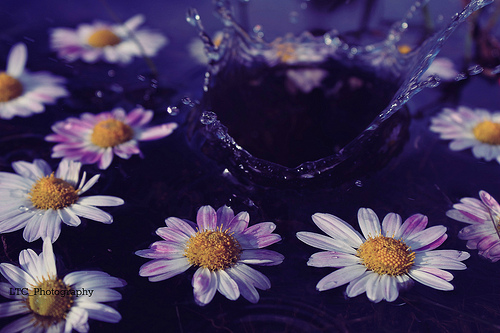

In [56]:
img

In [57]:
img= image.load_img(r"/content/drive/MyDrive/Nalaiyathiran/CNN/Flowers Dataset/training_set/daisy/10172567486_2748826a8b.jpg",target_size=(64,64))

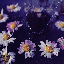

In [ ]:
img

In [ ]:
x= image.img_to_array(img)

In [ ]:
x


array([[[ 27.,  17.,  80.],
        [ 25.,  16.,  79.],
        [ 25.,  15.,  78.],
        ...,
        [121., 163., 179.],
        [ 61.,  66., 134.],
        [ 70.,  53.,  98.]],

       [[ 26.,  16.,  76.],
        [ 26.,  16.,  77.],
        [ 27.,  17.,  78.],
        ...,
        [ 78.,  74., 124.],
        [ 43.,  33., 102.],
        [ 63.,  45.,  95.]],

       [[ 26.,  17.,  74.],
        [ 28.,  18.,  78.],
        [ 30.,  20.,  81.],
        ...,
        [ 43.,  29.,  78.],
        [ 50.,  38., 102.],
        [ 68.,  53.,  84.]],

       ...,

       [[ 12.,   7.,  30.],
        [ 13.,   9.,  34.],
        [ 53.,  39.,  92.],
        ...,
        [ 24.,  19.,  51.],
        [ 22.,  12.,  47.],
        [ 18.,  12.,  48.]],

       [[ 13.,   7.,  35.],
        [ 54.,  30.,  88.],
        [ 79.,  59., 110.],
        ...,
        [ 26.,  14.,  52.],
        [ 23.,  11.,  47.],
        [ 34.,  24.,  59.]],

       [[ 51.,  30.,  87.],
        [ 77.,  58., 114.],
        [ 79.,  

In [ ]:
x= np.expand_dims(x,axis =0)

In [ ]:
x


array([[[[ 27.,  17.,  80.],
         [ 25.,  16.,  79.],
         [ 25.,  15.,  78.],
         ...,
         [121., 163., 179.],
         [ 61.,  66., 134.],
         [ 70.,  53.,  98.]],

        [[ 26.,  16.,  76.],
         [ 26.,  16.,  77.],
         [ 27.,  17.,  78.],
         ...,
         [ 78.,  74., 124.],
         [ 43.,  33., 102.],
         [ 63.,  45.,  95.]],

        [[ 26.,  17.,  74.],
         [ 28.,  18.,  78.],
         [ 30.,  20.,  81.],
         ...,
         [ 43.,  29.,  78.],
         [ 50.,  38., 102.],
         [ 68.,  53.,  84.]],

        ...,

        [[ 12.,   7.,  30.],
         [ 13.,   9.,  34.],
         [ 53.,  39.,  92.],
         ...,
         [ 24.,  19.,  51.],
         [ 22.,  12.,  47.],
         [ 18.,  12.,  48.]],

        [[ 13.,   7.,  35.],
         [ 54.,  30.,  88.],
         [ 79.,  59., 110.],
         ...,
         [ 26.,  14.,  52.],
         [ 23.,  11.,  47.],
         [ 34.,  24.,  59.]],

        [[ 51.,  30.,  87.],
       

In [ ]:
pred= model.predict(x)

In [ ]:
pred


array([[0.17799638, 0.24496631, 0.18149735, 0.16993712, 0.22560284]],
      dtype=float32)

In [ ]:
x_test.class_indices 

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
index= ['daisy','dandelion','rose','sunflower','tulip']

In [ ]:
index[np.argmax(pred)]

'dandelion'